In [1]:
import pandas as pd
import numpy as np



In [2]:
df = pd.read_csv('/content/drive/MyDrive/A B Test/marketing_AB.csv')
print(df.head())


   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  


In [3]:
Eksik_veri = df.isnull().sum()
print(Eksik_veri)

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [4]:
dtype = print(df.dtypes.head())
for i in df.columns:
  if df[i].dtype == 'object':
    print(df[i].value_counts())

for i in df.columns:
  if df[i].dtype == 'bool':
    print(df[i].value_counts())


Unnamed: 0     int64
user id        int64
test group    object
converted       bool
total ads      int64
dtype: object
test group
ad     564577
psa     23524
Name: count, dtype: int64
most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64
converted
False    573258
True      14843
Name: count, dtype: int64


In [6]:
#Grupların Sayısını kontrol edelim
print(df['test group'].value_counts())
df = df.rename(columns={"test group": "test_group"})
# 1. converted'i sayısallaştır
df["converted"] = df["converted"].astype(int)

test group
ad     564577
psa     23524
Name: count, dtype: int64


In [7]:
# Her grubun donuşum oranını hesaplayalım
conversion_rate = df.groupby('test_group')['converted'].mean()
print(conversion_rate)

test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [8]:
from scipy import stats
group_ad = df[df['test_group'] == 'ad']['converted']
group_psa = df[df['test_group'] == 'psa']['converted']

stats, p_value = stats.ttest_ind(group_ad, group_psa)
print(stats, p_value)

print(f"P-value: {p_value}")
print(f"Statistik değer: {stats}")


7.37040597428566 1.7033052627831264e-13
P-value: 1.7033052627831264e-13
Statistik değer: 7.37040597428566


<ipython-input-9-c913c663095a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette=['red', 'yellow'])


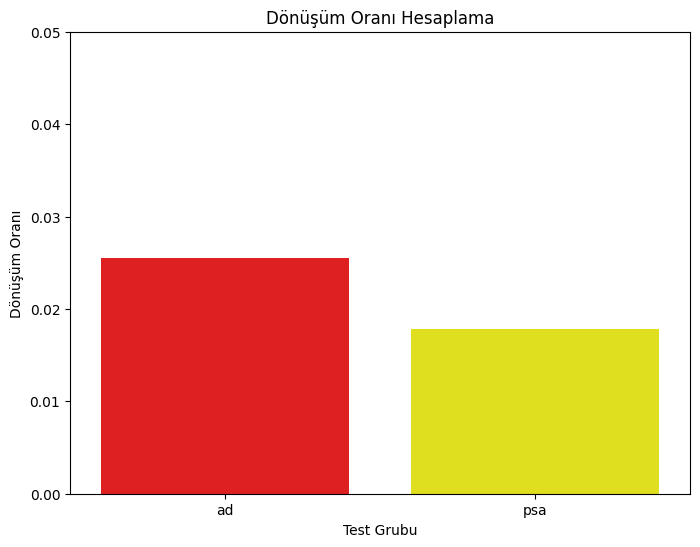

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

conversion_rate = df.groupby('test_group')['converted'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette=['red', 'yellow'])

plt.xlabel('Test Grubu')
plt.ylabel('Dönüşüm Oranı')
plt.title('Dönüşüm Oranı Hesaplama')
plt.ylim(0, 0.05)
plt.show()


In [ ]:
# Hafta içi mi hafta sonu mu ayıralım
df["is_weekend"] = df["most ads day"].isin(["Saturday", "Sunday"]).astype(int)
weekend_conversion = df.groupby('is_weekend')['converted'].mean()
print(weekend_conversion)

is_weekend
0    0.026206
1    0.022801
Name: converted, dtype: float64


In [ ]:
from scipy import stats
group_weekend = df[df['is_weekend'] == 1]['converted']
group_weekday = df[df['is_weekend'] == 0]['converted']
stats, p_value = stats.ttest_ind(group_weekend, group_weekday)
print(stats, p_value)

print(f"P-value: {p_value}")
print(f"Statistik değer: {stats}")


-7.506786286254731 6.068126671097947e-14
P-value: 6.068126671097947e-14
Statistik değer: -7.506786286254731


In [ ]:
df["time_period"] = np.where(df["most ads hour"].between(6, 18), "Day", "Night")

#Saat oranında dönüşüm oranını inceleyelim
tame_coversion = df.groupby('time_period')['converted'].mean()
print(tame_coversion)

time_period
Day      0.025203
Night    0.025339
Name: converted, dtype: float64


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA modeli oluşturalım
model = ols("converted ~ C(test_group) + C(is_weekend) + C(time_period)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Sonuçları görelim
print(anova_table)

                      sum_sq        df          F        PR(>F)
C(test_group)       1.375467       1.0  55.919362  7.560927e-14
C(is_weekend)       1.428129       1.0  58.060336  2.545773e-14
C(time_period)      0.002271       1.0   0.092333  7.612321e-01
Residual        14465.614073  588097.0        NaN           NaN
